# Wine Quality 

## Objective:

The goal of this project is to build a machine learning model to predict the quality of wine based on its physicochemical properties. 

The dataset used for this project contains various features that describe the chemical properties of red and white wines, along with a quality score.

## Dataset:

The Wine Quality dataset is sourced from the UCI Machine Learning Repository. 

It includes data on both red and white wines, each having 11 physicochemical properties and a quality score (ranging from 0 to 10) assigned by experts.

## Data Overview

**Data Description**:

- **Fixed Acidity**: Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
- **Volatile Acidity**: The amount of acetic acid in wine, which can lead to an unpleasant, vinegar taste.
- **Citric Acid**: Found in small quantities, citric acid can add 'freshness' and flavor to wines.
- **Residual Sugar**: The amount of sugar remaining after fermentation stops.
- **Chlorides**: The amount of salt in the wine.
- **Free Sulfur Dioxide**: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
- **Total Sulfur Dioxide**: Amount of free and bound forms of SO2; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
- **Density**: The density of water is close to that of water depending on the percent alcohol and sugar content.
- **pH**: Describes how acidic or basic a wine is on a scale of 0 (very acidic) to 14 (very basic).
- **Sulphates**: A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.
- **Alcohol**: The percent alcohol content of the wine.



## Target 

**Quality Scores**:
- The target variable is the wine quality score, which ranges from 0 to 10.


####  Load Dataset 

In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
df = pd.read_csv("C:\\Users\\Khan Mokhit\\My Drive\\winequality-red.csv")

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Understanding the data

In [28]:
# In this we can find all the data types of the features and the information about non null values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
# In this we can get all the Numerical information of the data 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Correlation 

In [83]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [30]:
# Shape of the data 

df.shape

(1599, 12)

##### We can see that there is no null values present in the data set

In [31]:
# Checking null values 

df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
# Checking for the duplicate entries in the data 

df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [33]:
# Dropping the duplicate entries

df.drop_duplicates(inplace=True)

In [34]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


##### Now we can see that all the duplicate entries are deleted from the data set 

In [35]:
# Now the shape of the data will be changed 

df.shape

(1359, 12)

In [51]:
# Reset The Index

df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Analyze the Important Features with the help of visualizations 

### Histogram for all the Features in the data to understand the distribution of the features 

We can see that most of the features are normally distributed and some of the features distribution is right skewed

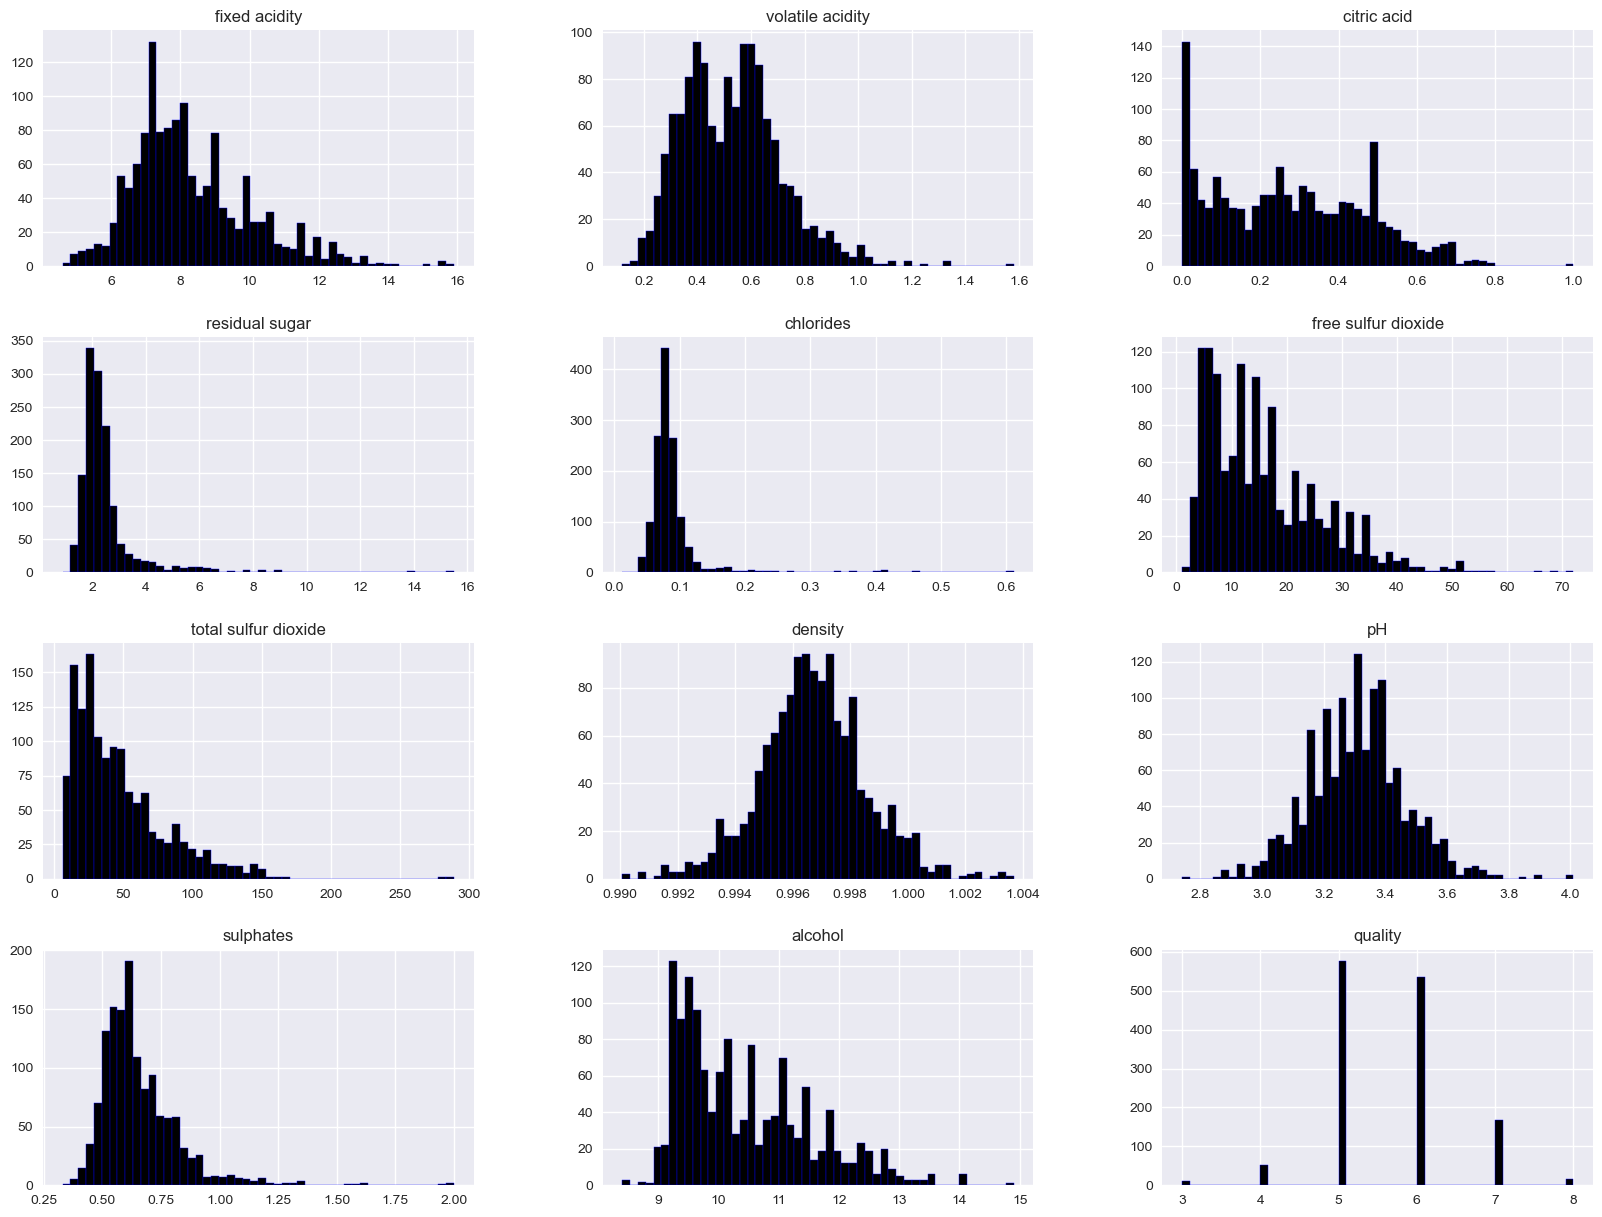

In [53]:
plt.style.use('seaborn')
df.hist(bins=50 , ec='b' ,  figsize=(20,15) , color='black')
plt.show()

### Analyzing the Wine quality according to the amount of the Alcohol

Here we can see that as the amount of Alcohol in increasing the Wine Quality is also increasing

It states that these two features are positively correlated 

Text(0.5, 1.0, 'Quality based on the amount of Alcohol')

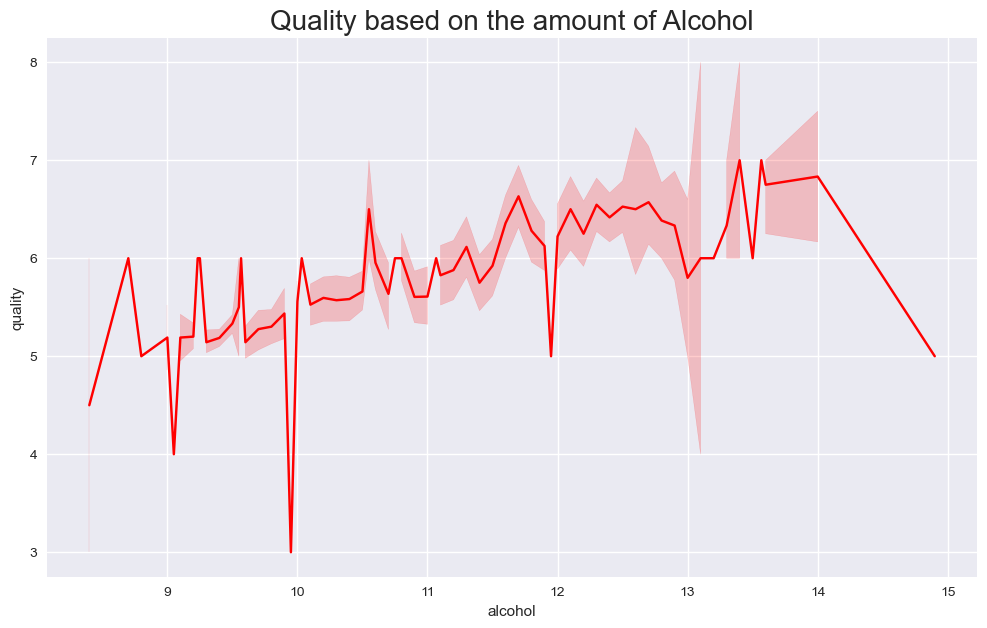

In [57]:
plt.figure(figsize=(12,7))
sns.lineplot(x=df.alcohol,y=df.quality , color='r')
plt.title("Quality based on the amount of Alcohol" , size = 20)

### The pie chart according to the percentage of different quality 

#### We can see that approx 80% of the Wine Quality is 5 or 6 

In [45]:
percentage = df.quality.value_counts(normalize = True)*100

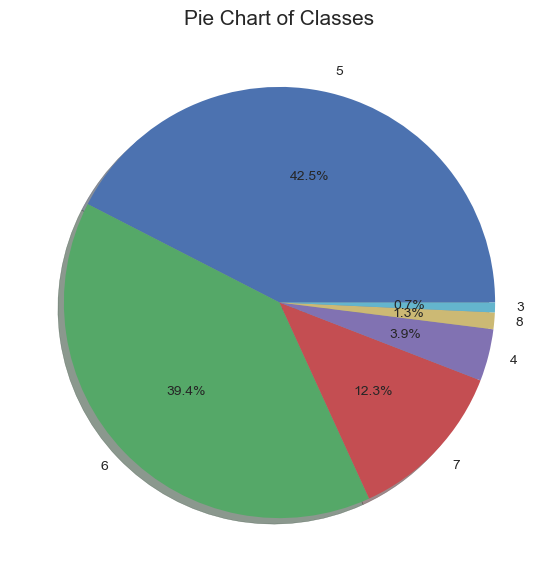

In [49]:
plt.figure(figsize=(12,7))
plt.pie(percentage , labels = percentage.index , autopct='%1.1f%%' ,shadow = True  )
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

# Training The Model 

In [59]:
# Import all the necessory libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

##### Deviding the data set into dependent and independent features

### Dependent

In [60]:
x = df.drop(df[['quality']],axis=1)

In [62]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


### Independent

In [63]:
y = df['quality']

In [64]:
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

### Devide it into the Training and Testing data set using Train_Test_Split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state=42)

In [66]:
x_train.shape,x_test.shape , y_train.shape , y_test.shape

((951, 11), (408, 11), (951,), (408,))

### Standerdize the data using Standard Scaler

In [67]:
scaler = StandardScaler()

In [68]:
x_train = scaler.fit_transform(x_train)

In [69]:
x_test = scaler.transform(x_test)

### Fittinng the Model

In [70]:
regressor = LinearRegression()

In [71]:
regressor.fit(x_train,y_train)

LinearRegression()

### Testing

In [72]:
y_pred = regressor.predict(x_test)

In [74]:
y_pred

array([5.20601276, 5.80794046, 6.37839552, 5.15367312, 5.16750226,
       6.77514884, 5.73470854, 4.79469636, 5.83275894, 5.70543704,
       6.25294395, 5.9092998 , 6.03344825, 5.54223606, 6.29250125,
       5.26577971, 5.98615142, 5.31451491, 5.21354188, 5.88397933,
       5.22357396, 6.13169005, 5.29774422, 4.76010538, 5.75638592,
       4.78310043, 5.69428478, 5.37477087, 5.23690585, 5.34152794,
       6.05312294, 6.31583617, 5.77220141, 4.65304119, 5.61909201,
       6.25444472, 4.8521017 , 5.87743732, 5.26477632, 6.21207868,
       5.20286561, 5.76046454, 6.01550139, 4.62407791, 5.43790661,
       5.46435119, 5.07638529, 4.38727053, 5.12270188, 5.82943513,
       5.52957767, 6.1260587 , 5.91491236, 5.62848967, 6.28921261,
       5.15275593, 5.22886999, 5.20480431, 5.01558688, 6.02472051,
       4.89272727, 6.12395561, 5.14575604, 5.90720404, 5.78676722,
       5.94073106, 5.12583837, 5.47610782, 6.09571178, 6.12410372,
       5.58546665, 5.97538564, 5.97748928, 6.08530108, 5.82073

### Calculate the accuracy of the model using Mean_Squered_Error

In [75]:
mse = mean_squared_error(y_test,y_pred)

In [77]:
Accuracy = np.sqrt(mse)

In [78]:
Accuracy

0.6469517539049041

### Accuracy of the model is 64%

### Testinng on random data and getting the output

In [90]:
regressor.predict([[1,0.70,0.00,1,0.076,15.0,34.0,0.9978,3.51,0.56,10]])

array([5.1644756])

#### As we can see the model predicted the Quality of the Wine is 5.14

## Conclusion

#### Summary:

* Successfully built a machine learning model to predict wine quality based on physicochemical properties.


* The Random Forest Classifier provided the best performance, highlighting the importance of certain chemical properties in determining wine quality.

## Future Work:

* Further tuning and experimenting with ensemble methods.


* Exploring the potential of deep learning models for better performance.


* Extending the study to include more diverse wine datasets for broader applicability.